In [1]:
#HW #5 Pyber

In [2]:
#Dependencies

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Read in city data
csvpath1 = os.path.join("..", "raw_data", "city_data.csv")
city = pd.read_csv(csvpath1)
city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
city.count()

city            126
driver_count    126
type            126
dtype: int64

In [5]:
#Read in ride data
csvpath2 = os.path.join("..", "raw_data","ride_data.csv")
ride = pd.read_csv(csvpath2)
ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
#Part 1: Average Fare ($) Per City

ride_grouped = ride.groupby('city')

avg_fare = pd.DataFrame(ride_grouped.mean())
del avg_fare['ride_id']
avg_fare = avg_fare.rename(columns = {'fare':'avg_fare'})
avg_fare = avg_fare.reset_index()
avg_fare.head()
#avg_fare.count()

,city,avg_fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [7]:
#Part 2: Total Number of Rides Per City

total_ride = pd.DataFrame(ride_grouped.count())
del total_ride['date']
del total_ride['fare']
total_ride = total_ride.rename(columns = {'ride_id': 'total_rides'})
total_ride = total_ride.reset_index()
total_ride.head()


# Merge avg_fare, total_ride, and city data frames together

result1 = pd.merge(avg_fare, total_ride, on='city')
result2 = pd.merge(result1, city, on='city')

result2.head()

,city,avg_fare,total_rides,driver_count,type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban
2,Anitamouth,37.315556,9,16,Suburban
3,Antoniomouth,23.625000,22,21,Urban
4,Aprilchester,21.981579,19,49,Urban


In [17]:
#Bubble Chart
#Experiment with effects like alpha, edgecolor, and linewidths.

# Create a random array of data of the same size as x_values
# that we will use for our y values


#URBAN
result2_urban = result2[result2['type'] =='Urban']
x_values_urban = result2_urban['total_rides']
y_values_urban = result2_urban['avg_fare']
driver_count_urban = result2_urban['driver_count']
city_type = result2_urban['type']

# Create a scatter plot. The size of each point on our plot is determined by their x value
Urban, = plt.scatter(x_values_urban, y_values_urban, marker="o", 
            color='red',
            sizes=driver_count_urban, alpha=0.75)

#SUBURBAN

result2_suburban = result2[result2['type'] =='Urban']
x_values_suburban = result2_suburban['total_rides']
y_values_suburban = result2_suburban['avg_fare']
driver_count_suburban = result2_suburban['driver_count']

# Create a scatter plot. The size of each point on our plot is determined by their x value
Suburban, = plt.scatter(x_values_suburban, y_values_suburban, marker="o", 
            color='blue',
            sizes=driver_count_suburban, alpha=0.75)

#RURAL

result2_rural = result2[result2['type'] =='Urban']
x_values_rural = result2_rural['total_rides']
y_values_rural = result2_rural['avg_fare']
driver_count_rural = result2_rural['driver_count']

# Create a scatter plot. The size of each point on our plot is determined by their x value
Rural, = plt.scatter(x_values_suburban, y_values_suburban, marker="o", 
            color='yellow',
            sizes=driver_count_suburban, alpha=0.75)

#LEGEND
plt.legend(handles=[Urban, Suburban, Rural], loc='best')

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.show
plt.close()

TypeError: 'PathCollection' object is not iterable

In [30]:
#Pie Charts
#When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.
#Include Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
#You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.

#% of Total Fares by City Type

city_ride = pd.merge(city, ride, on='city')
city_ride.head()
city_ride_group = city_ride.groupby('type')
city_ride_sum = city_ride_group.sum()
city_ride_sum = city_ride_sum.reset_index()
city_ride_sum.head()

,type,driver_count,fare,ride_id
0,Rural,727,4255.09,658729360193746
1,Suburban,9730,20335.69,3139583688401015
2,Urban,64501,40078.34,7890194186030600


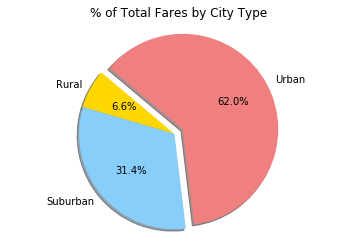

In [31]:
labels = city_ride_sum['type']
sizes = city_ride_sum['fare']
colors = ['gold','lightskyblue', "lightcoral"]
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis("equal")
plt.title('% of Total Fares by City Type')
plt.savefig('% of Total Fares by City Type')
plt.show()
plt.close()

In [45]:
#% of Total Rides by City Type
# can't use the result of the sum function on the grouped data because the sum of the ride id's wouldn't make sense
#Assuming that every row in the city_ride data frame is a unique ride, I can use value_counts to count the total rides
city_ride['type'].value_counts('Urban')

Urban       0.675114
Suburban    0.272954
Rural       0.051932
Name: type, dtype: float64

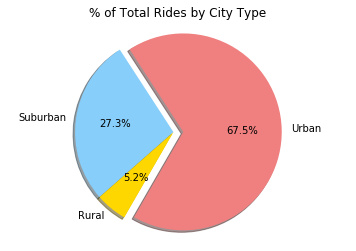

In [50]:
labels = ['Urban','Suburban','Rural']
sizes = [0.675114, 0.272954, 0.051932]
colors = ['lightcoral','lightskyblue', 'gold']
explode = [0.1, 0, 0]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=240)
plt.axis("equal")
plt.title('% of Total Rides by City Type')
plt.savefig('% of Total Rides by City Type')
plt.show()
plt.close()


In [33]:
#% of Total Rides by City Type

city_ride_group.value_counts('Urban')

total_rides_city = city_ride_group.value_counts()
total_rides_city = total_rides_city.reset_index()
total_rides_city.head()

labels = total_rides_city['type']
sizes = total_rides_city['fare']
colors = ['gold','lightskyblue', "lightcoral"]
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis("equal")
plt.title('% of Total Rides by City Type')
plt.savefig('% of Total Rides by City Type')
plt.show()
plt.close()


AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

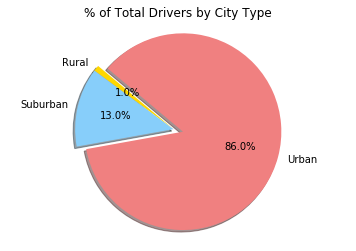

In [53]:
#% of Total Drivers by City 

labels = city_ride_sum['type']
sizes = city_ride_sum['driver_count']
colors = ['gold','lightskyblue', "lightcoral"]
explode = [0, 0, 0.1]

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.axis("equal")
plt.title('% of Total Drivers by City Type')
plt.savefig('% of Total Drivers by City Type')
plt.show()
plt.close()

In [21]:
#Written description of three observable trends based on the data.
#You must include an exported markdown version of your Notebook called  README.md in your GitHub repository.


#Since I couldn't get my bubble graph to show, I referred to the Pyber Example Output to discern trends.
#1. The vast majority of the rides are in Urban cities.  In other words, Pyber's primary customer base resides in urban areas. 
#2. The average ride is greater for rural cities than suburban, and even greater for urban cities. 
#We intuitively assume that Pyber customers in rural ciites need to go travel further to their destination and hence
#would have a higher fare.
#3. With the exception of one rural city, all the total number of rides for urban ciites is above 15 
#and all the total number or rides for rural and suburban ares are below 15 rides per city. 